**OVERVIEW**

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**INSTALLING PACKAGES**

In [295]:
## we start by importing the necessary libraries for data manipulation and viz
## !pip install seaborn
## !pip install statsmodels

from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline 
# Esse comando serve para plotar os gráficos estáticos logo abaixo da célula,

# existem outras configurações do %matplolib que podem mostrar os gráficos em outras abas ou gráficos dinâmicos.
# Por padrão, desde a versão 3.7 do python anaconda, a configuração padrão do %matplotlib já é o inline.
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html


In [296]:
## adding some ML capabilities with Scikit-learn
## !pip install scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


**IMPORTING DATASET**

**COLUMNS DESCRIPTION**

. passengerid = ID do passageiro do navio (código primário).

. survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.

. pclass = Tipo de classe de passagem (Do 1 ao 3), (1 = 1st, 2 = 2nd, 3 = 3rd).

. name = Nome do passageiro

. sex = Gênero do passageiro, sendo masculino e feminino.

. age = Idade do passageiro na data da ocorrência do naufrágio.

. sibsp = Número de irmãos / cônjuges a bordo.

. parch = Número de pais / filhos a bordo.

. ticket = Código do ticket.

. fare = Valor da passagem.

. cabin = Código de identificação da Cabine.

. embarked = Local ondem o passageiro embarcou no navio: C = Cherbourg, Q = Queenstown, S = Southampton)

In [297]:
# Importing the train dataset and verifying the first info
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [298]:
#same thing for the test dataset
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**EXPLORATORY ANALYSIS**

In [299]:
#some detail on our columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [300]:
#count the NAs
titanic.isna().sum()

#isna() returns true (or 1) when the value is non existent (NaN) then we can .sum() the colum


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [301]:
#or, to be more complete, let's see the proportion of NaN in each column
pd.DataFrame(
    zip(    ##zip joins two tupples
        titanic.isna().sum(),               ##first column
        titanic.isna().sum()/len(titanic)   ##second column
    ),
    columns = ['Count', 'Proportion'],
    index = titanic.columns
)

,Count,Proportion
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [302]:
#Lets see some quantitative description of our dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [303]:
#our target variable is the "Survived" column. Let's see how many people survived

titanic.Survived.value_counts()/len(titanic)*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

**INITIALIZING PRE-PROCESSING**

Starting by KDD process - Knowledge Discovery in Database

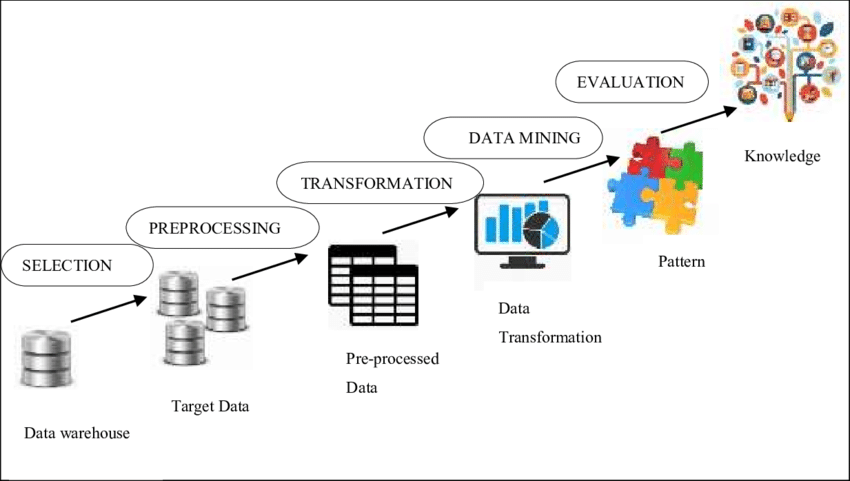

In [304]:
Image('/kaggle/input/images-ml-decision-tree/kdd.png')

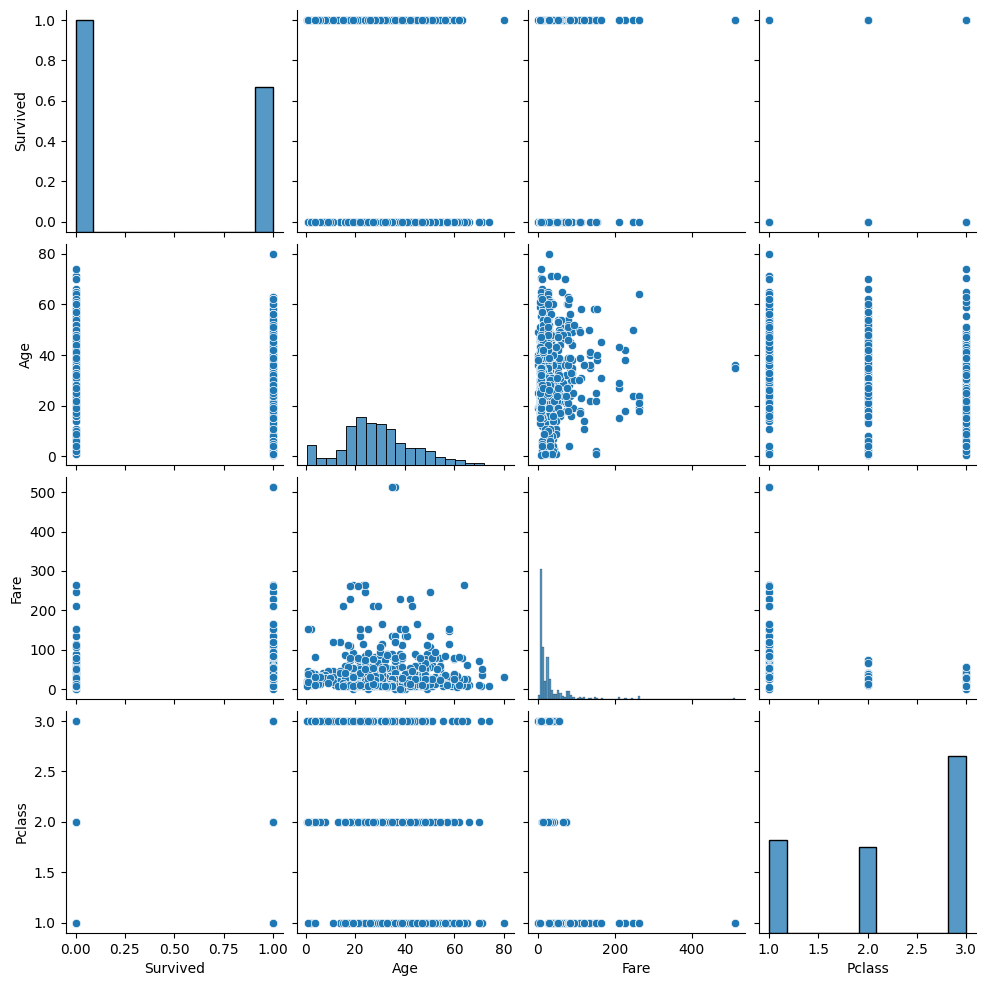

In [305]:
#I always like to start with pairplot. It shows the distribution of some variables and we can vizualise the possible correlation between them
# but in this case is not that impressive
sb.pairplot(titanic[['Survived','Age','Fare','Sex', 'Pclass']].dropna())

In [306]:
print("Seaborn version:", sb.__version__)

Seaborn version: 0.12.2


<Axes: xlabel='Fare', ylabel='Count'>

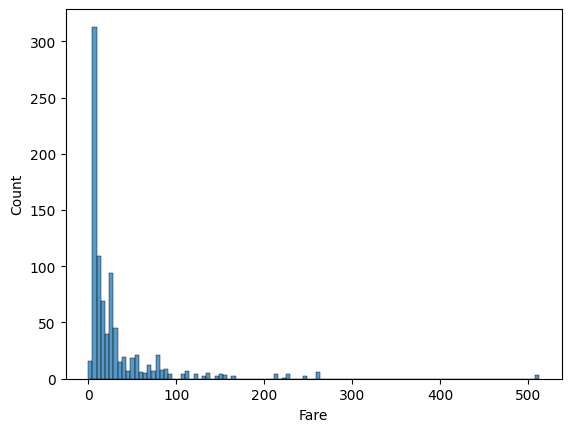

In [307]:
## lets check the variable fare

##sb.histplot(data = titanic, x="Fare")
sb.histplot(titanic['Fare'])


## seaborn is a great library for image plotting

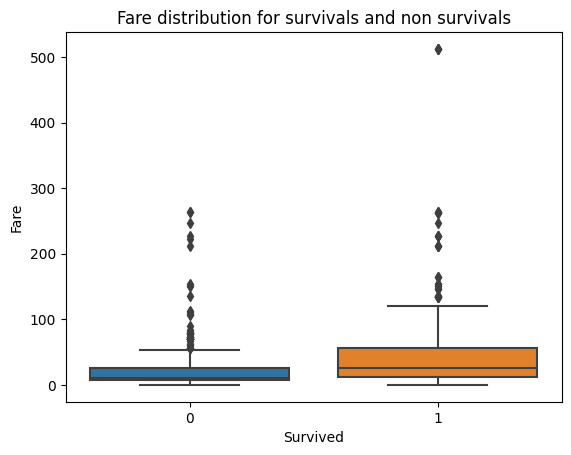

In [308]:
sb.boxplot(data = titanic, x = "Survived", y = "Fare")
plt.title("Fare distribution for survivals and non survivals")
plt.show()

In [309]:
## Let's eliminate some outliers from the "Fare" columns

titanic.loc[titanic['Fare']>=300]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [310]:
## We can truncate these three values to the maximum of Fare = 300

titanic.loc[titanic['Fare']>=300, 'Fare'] = 300

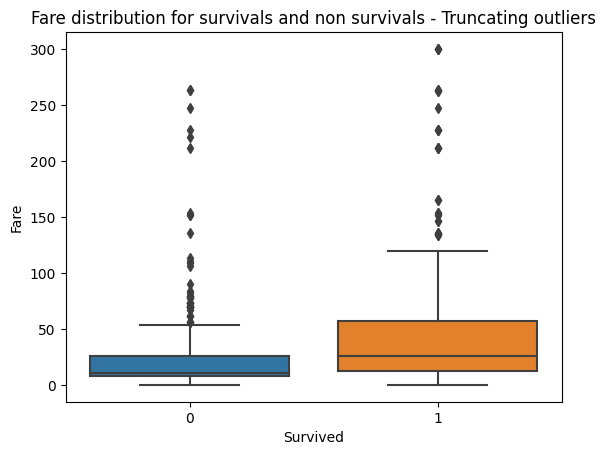

In [311]:
#repeating the same plot as before
sb.boxplot(data = titanic, x = "Survived", y = "Fare")
plt.title("Fare distribution for survivals and non survivals - Truncating outliers")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

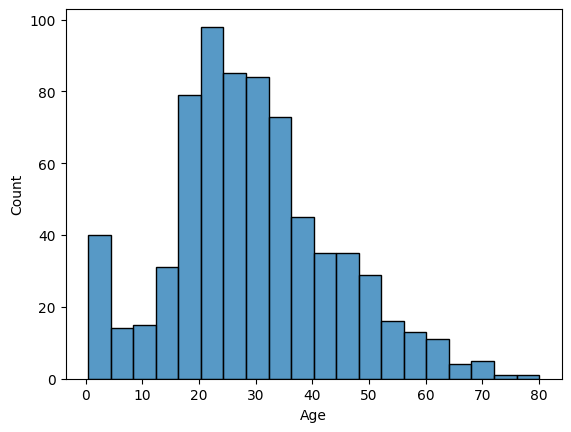

In [312]:
#evaluating the age of passengers

sb.histplot(data = titanic, x = 'Age')

<Axes: xlabel='Survived', ylabel='Age'>

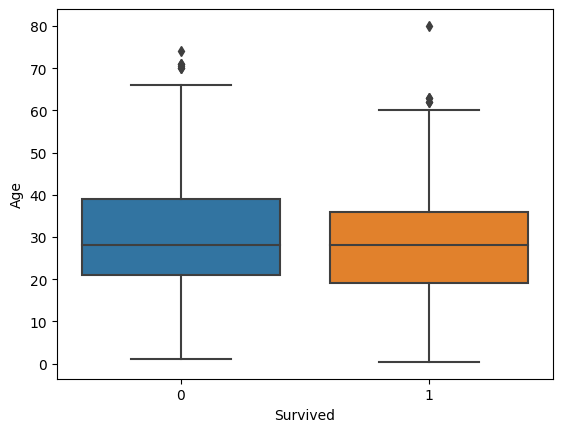

In [313]:
sb.boxplot(data = titanic, y = 'Age', x = 'Survived')

**SUSBSTITUTING NaN VALUES**

In [314]:
## Completing NaN values
print('Age info:\nAverage= {} \nMedian = {}'.format(titanic['Age'].mean(), titanic['Age'].median()))

Age info:
Average= 29.69911764705882 
Median = 28.0


In [315]:
## evaluating for sex
C_median = titanic['Age'].groupby(by= titanic.Sex).median()

C_median

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [316]:
## evaluating for class
C_median = titanic['Age'].groupby(by= titanic.Pclass).median()

C_median

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [317]:
#We will find the mean age for each class/sex group

trainMeans = titanic.groupby(['Sex','Pclass'])['Age'].mean()

trainMeans

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [318]:
## Applying the averages

def age_estimate(x):
    if not np.isnan(x['Age']):                  ## if age is not NaN
        return x['Age']                         ## return itself (the age)
    return trainMeans[x["Sex"], x['Pclass']]    ## otherwise retuns the age calculated in the trainMeans formula


titanic['Age'] = titanic.apply(age_estimate, axis=1)

In [319]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,31.489295
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,43.973014
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,300.000000


**QUALITATIVE PREDICTIVE VARIABLES**

<Axes: xlabel='Sex'>

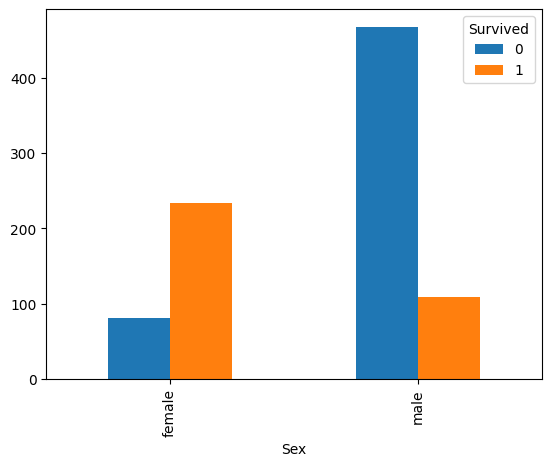

In [320]:
#Evaluatint effect of "Sex"
titanic.groupby('Survived')['Sex'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Embarked'>

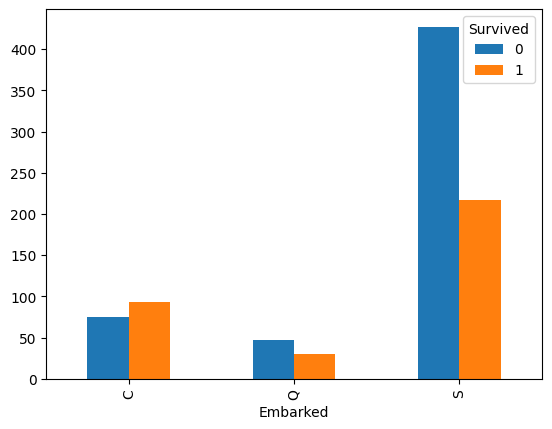

In [321]:
#Evaluatint effect of where the passager embarked
titanic.groupby('Survived')['Embarked'].value_counts().unstack(0).plot.bar()

In [322]:
# Fill all NAN (only 2 values) of the "Embarked" column with the Mode

titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**CREATING DUMMIES FOR QUALITATIVE VARIABLES**

Some algorithms have dificulties in evaluating categorical values. 
Specially if the category is represented as a numerical value.
In this case, one strategy is to create what we call dummy columns, one hot enconding.

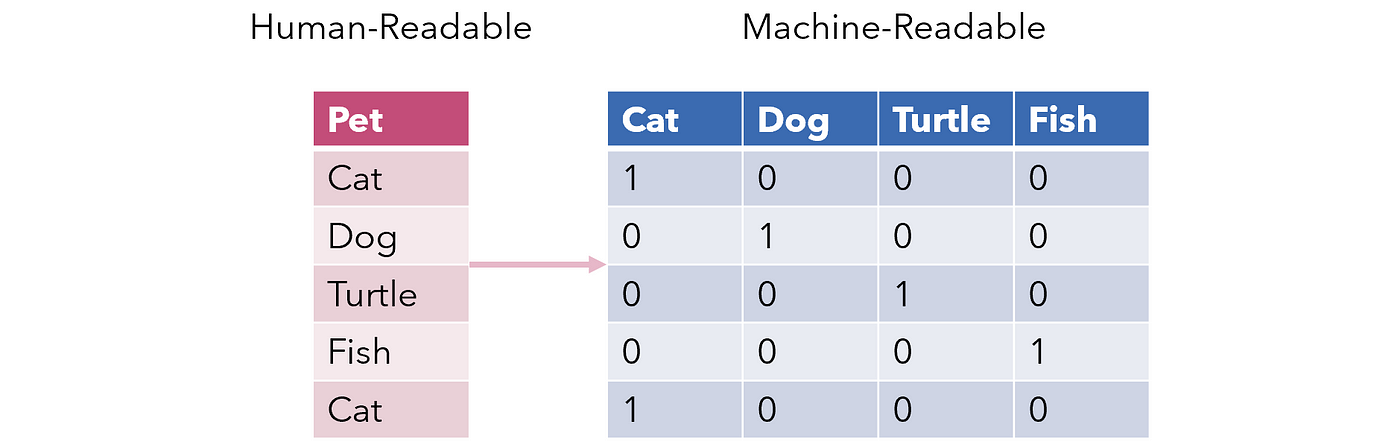

In [323]:
Image('/kaggle/input/images-ml-decision-tree/hot encoding dummy.png')

In [324]:
#The 'get_dummies' method will evaluate the column selected and return True or false for each possible value
pd.get_dummies(titanic['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [325]:
#Using the 'dropfirst' is commonly used, because you if you have n possible results...
#you can determine all the values with n-1 columns (i.e, if all columns return False, the dropped column would be True)
pd.get_dummies(titanic['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [326]:
# creating a column that says if the passanger is male or not
titanic['male'] = pd.get_dummies(
    titanic['Sex'],
    drop_first=True
)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [327]:
#doing the same for the embarked place
embark_dummies = pd.get_dummies(
    titanic['Embarked'], #This time we will do the same for the embarked column
    drop_first=True, #dropping the first column (should be C)
    prefix='Embarked_' #putting a prefix so we end up with Embarked_Q and Embarked_S columns
)

embark_dummies.head()

,Embarked__Q,Embarked__S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [328]:
#adding these columns to my dataframe with the concat method
titanic = pd.concat(
    [ titanic , embark_dummies ],   #the two dataframes we want to unite
    axis=1                          #the axis=1 indicate we will concatenate the dataframes horizontally (add columns)
)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True


In [329]:
#now we do not need the "Sex" or "Embarked" columns anymore
titanic.drop(
    ['Sex','Embarked'],     # the columns to be dropped
    axis = 1,               # the axis of drop (1 means column)
    inplace=True            # means we will substitute the original dataframe
)

#The inplace true means we will replace the original dataframe. It is the same as if we had typed:
#titanic = titanic.drop(['Sex','Embarked'],axis = 1)

titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


**WORKING ON OTHER QUALITATIVE VARIABLES**

In [330]:
#Let's review where we are so far

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  male         891 non-null    bool   
 11  Embarked__Q  891 non-null    bool   
 12  Embarked__S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 72.3+ KB


In [331]:
#Pclass is described as Int64 because the value is numerical (1, 2 or 3)
#But we do not want our model to view it as a quantitative value
#so we change to class

titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [332]:
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Survived'] = titanic['Survived'].astype('bool')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  male         891 non-null    bool    
 11  Embarked__Q  891 non-null    bool    
 12  Embarked__S  891 non-null    bool    
dtypes: bool(4), category(1), float64(2), int64(3), object(3)
memory usage: 60.3+ KB


In [333]:
#Now let's create our dummies for Pclass
pclass_dummies = pd.get_dummies(
    titanic['Pclass'],              #Create a dummy that returns the columns 
    drop_first=True,                #Droppint the Pclass_1 column that will not be necessary
    prefix="Pclass_"                #Pclass_2 and #Pclass_3
)

titanic = pd.concat(
    [ titanic , pclass_dummies ],   #the two dataframes we want to unite
    axis=1                          #the axis=1 indicate we will concatenate the dataframes horizontally (add columns)
)

titanic.drop(
    ['Pclass'],                     #with the dummies ready, we do not need the original Pclass column
    axis = 1,
    inplace=True
)

In [334]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Embarked__Q,Embarked__S,Pclass__2,Pclass__3
0,1,False,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True,False,True
1,2,True,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False,False,False
2,3,True,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,True
3,4,True,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,False,False
4,5,False,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True,False,True


In [335]:
##finally, let's drop the individual values that will not contribute to the machine learning
titanic_train = titanic.drop(['PassengerId','Name','Cabin', 'Ticket'], axis=1)
titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,male,Embarked__Q,Embarked__S,Pclass__2,Pclass__3
0,False,22.0,1,0,7.2500,True,False,True,False,True
1,True,38.0,1,0,71.2833,False,False,False,False,False
2,True,26.0,0,0,7.9250,False,False,True,False,True
3,True,35.0,1,0,53.1000,False,False,True,False,False
4,False,35.0,0,0,8.0500,True,False,True,False,True


In [336]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    bool   
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   male         891 non-null    bool   
 6   Embarked__Q  891 non-null    bool   
 7   Embarked__S  891 non-null    bool   
 8   Pclass__2    891 non-null    bool   
 9   Pclass__3    891 non-null    bool   
dtypes: bool(6), float64(2), int64(2)
memory usage: 33.2 KB


**SEPARATING TEST AND TRAIN DATA**

In this phase we divide our train model in two parts

one part will be used to train the model

the other part will evaluate the assertiveness of the model

In [337]:
##Using the train_test_split from SKLEARN

'''
(function) def train_test_split(
    *arrays: Any,
    test_size: Float | None = None,
    train_size: Float | None = None,
    random_state: Int | RandomState | None = None,
    shuffle: bool = True,
    stratify: ArrayLike | None = None
) -> list

Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation, next(ShuffleSplit().split(X, y)), 
and application to input data into a single call for splitting (and optionally subsampling) data into a one-liner.
'''

X_train, X_test, y_train, y_test = train_test_split(
    titanic_train.drop('Survived',axis=1),          # independent values, will be the dataframe without the target column
    titanic_train['Survived'],                      # dependent value, target column
    test_size=0.10,                                 # how much of the dataframe will be used for testing (in this case 90% will be used for training)
    random_state=10                                 # including a random state just ensures the result of the shuffle will always be the same for this block
)

In [338]:
##X_train is the matrix of values that the model will use to try and understand the behaviour of y_train
X_train

,Age,SibSp,Parch,Fare,male,Embarked__Q,Embarked__S,Pclass__2,Pclass__3
429,32.000000,0,0,8.0500,True,False,True,False,True
629,26.507589,0,0,7.7333,True,True,False,False,True
351,41.281386,0,0,35.0000,True,False,True,False,False
45,26.507589,0,0,8.0500,True,False,True,False,True
577,39.000000,1,0,55.9000,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
369,24.000000,0,0,69.3000,False,False,False,False,False
320,22.000000,0,0,7.2500,True,False,True,False,True
527,41.281386,0,0,221.7792,True,False,True,False,False
125,12.000000,1,0,11.2417,True,False,False,False,True


In [339]:
y_train

429     True
629    False
351    False
45     False
577     True
       ...  
369     True
320    False
527    False
125     True
265    False
Name: Survived, Length: 801, dtype: bool

In [340]:
##after the training, the model will try to apply the resulting formula into the X_test values, and see if got correct results when comparing
##to the y_test results
X_test

,Age,SibSp,Parch,Fare,male,Embarked__Q,Embarked__S,Pclass__2,Pclass__3
590,35.0,0,0,7.1250,True,False,True,False,True
131,20.0,0,0,7.0500,True,False,True,False,True
628,26.0,0,0,7.8958,True,False,True,False,True
195,58.0,0,0,146.5208,False,False,False,False,False
230,35.0,1,0,83.4750,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
722,34.0,0,0,13.0000,True,False,True,True,False
581,39.0,1,1,110.8833,False,False,False,False,False
177,50.0,0,0,28.7125,False,False,False,False,False
418,30.0,0,0,13.0000,True,False,True,True,False


**FIRST MODEL - DECISION TREE**

HYPERPARAMETERS

tree = DecisionTreeClassifier(

criterion='gini', # gini vem por default, mas podemos optar por entropy

splitter='best', # a estratégia utilizada para fazer a separação de cada nó # ela também pode ser feita de forma randômica utilizando 'random'

max_depth= None, # a máxima profundida que sua árvore de decisão pode ter # se for None ela vai buscar a máxima pureza possível

min_samples_split = 2, # o mínimo de registros necessários para que uma separação seja feita

min_samples_leaf = 1, # o mínimo de registros necessários em cada nós-folha (veja a primeira imagem)

max_features = None, # o número de atributos que será considerado durante o split # None -> seleciona todos os atributos, 'sqrt' -> raiz quadrada do número dos atributos, 'log2' -> log de base 2 do número de atributos

max_leaf_nodes=None, # a quantidade máxima de nós-folha que a árvore pode ter # se for None ele não limitará o número de nós-folha

min_impurity_decrease=0.0, # o split irá ocorrer em cada nó se o decréscimo da impureza foi maior ou igual a este valor

random_state= 17, # permite gerar a mesma amostra (o notebook ser reproduzível)

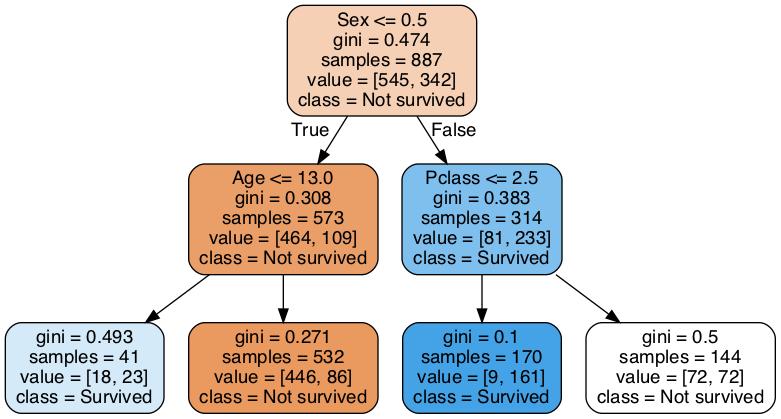

In [341]:
Image('/kaggle/input/images-ml-decision-tree/Decision_Tree.png')

In [342]:
#Let's use the DecisionTreeClassifier class

'''
class DecisionTreeClassifier(
    *,
    criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    splitter: Literal['best', 'random'] = "best",
    max_depth: Int | None = None,
    min_samples_split: float | int = 2,
    min_samples_leaf: float | int = 1,
    min_weight_fraction_leaf: Float = 0,
    max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None = None,
    random_state: Int | RandomState | None = None,
    max_leaf_nodes: Int | None = None,
    min_impurity_decrease: Float = 0,
    class_weight: Mapping | str | Sequence[Mapping] | None = None,
    ccp_alpha: float = 0
)
'''

Classif_tree = DecisionTreeClassifier(random_state=10)

In [343]:
#training the decision tree with our X_train matrix and y_train results

classif = Classif_tree.fit(X_train,y_train)

In [344]:
#Lets check the most important features

classif.feature_importances_

array([0.25835901, 0.0619522 , 0.02407008, 0.26625401, 0.30001568,
       0.00521628, 0.00515212, 0.00241679, 0.07656382])

In [345]:
#Damn! Which is which here? Lets find out.
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Embarked__Q', 'Embarked__S',
       'Pclass__2', 'Pclass__3'],
      dtype='object')

In [346]:
df = pd.DataFrame(X_train.columns)

df2 = pd.DataFrame(classif.feature_importances_)

df3 = pd.concat(
    [df, df2],
    axis =1
)

tree_importance = df3.set_axis(['Feature', 'Importance'], axis = 'columns').sort_values(by=['Importance'], ascending=False)

tree_importance.head(10)

,Feature,Importance
4,male,0.300016
3,Fare,0.266254
0,Age,0.258359
8,Pclass__3,0.076564
1,SibSp,0.061952
2,Parch,0.024070
5,Embarked__Q,0.005216
6,Embarked__S,0.005152
7,Pclass__2,0.002417


In [347]:
#predicting our y with the X_train and the classif model

y_pred_all = classif.predict(X_train)

**CONFUSION MATRIX**

In [348]:
pd.crosstab(y_train, y_pred_all)

col_0,False,True
Survived,,
False,487,1
True,10,303


In [349]:
# Or, from sklearn.metrics import confusion_matrix

# Matriz de Confusão

confusion_matrix = confusion_matrix(y_train, y_pred_all)
confusion_matrix

array([[487,   1],
       [ 10, 303]])

In [350]:
print(classification_report(y_train, y_pred_all,digits=2))

# Resultado do classification_report:
# Precision score = VP/(VP+FP)
# Recall score = VP/(VP+FN)
# F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       488
        True       1.00      0.97      0.98       313

    accuracy                           0.99       801
   macro avg       0.99      0.98      0.99       801
weighted avg       0.99      0.99      0.99       801



**EVALUATING THE RESULTS**

Seems good right? Very high precision, recall and F1 score....

Well, actually not. In the decision tree if we "let it go" as further as it wants, it will basically explain every individual case by its own parameters

Usually if we get a precision higher than 0.8, we should suspect something is too good to be true

Let's plot the current tree so we can see what we are talking about


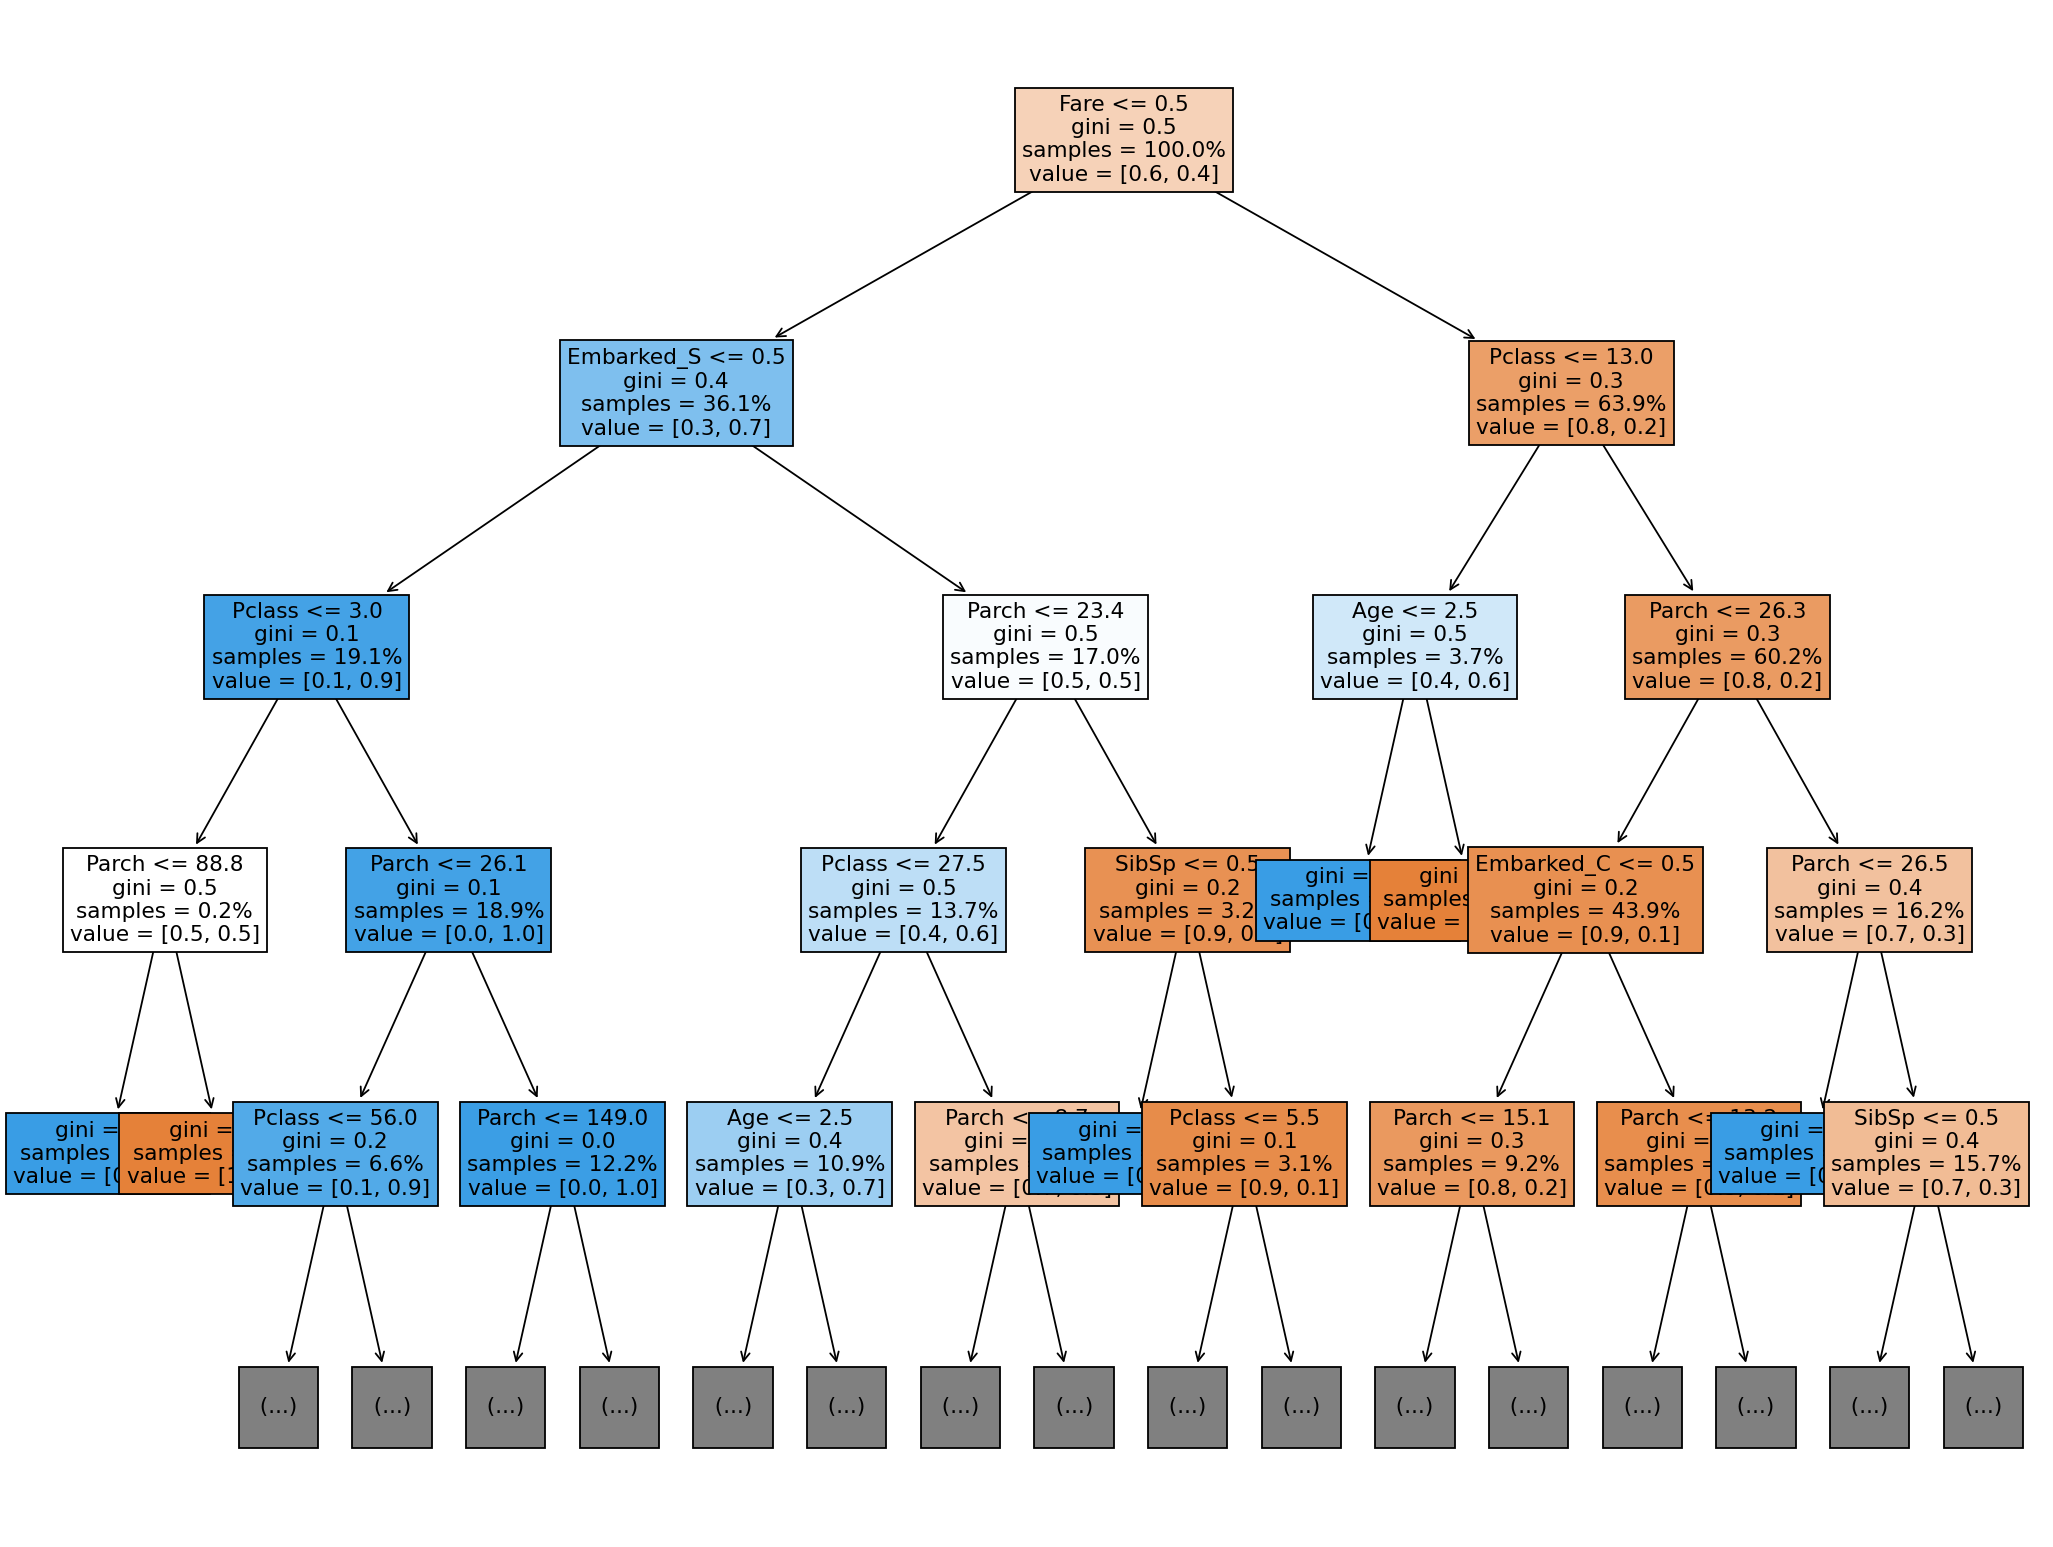

In [351]:
# criando o fig e o axes  - selecionando alguns niveis
fig, ax = plt.subplots(figsize=(16,12),dpi=130)
#criando o plot
plot_tree(classif, # a decision tree que será plotada
          feature_names =(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Embarked_C','Embarked_Q', 'Embarked_S',
                           'Pclass_1', 'Pclass_2', 'Pclass_3']), # trará o nome das features utilizadas na primeira linha de cada nó
          ax=ax, # plotamos no axes criado do matplotlib
          precision=1, # precisão dos valores numéricos
          filled=True,
          max_depth=4, #  escolhemos a profundidade da árvore
          proportion = True, # retorna a proporção dos valores das amostras
          fontsize = 12 # mudar o tamanho da fonte
        )
#plotando o gráfico
plt.tight_layout();

In [352]:
#And down it goes... we should get the most important features and limit how much we want our decision tree to go down...

#Let's go back and do the DecisionTreeClassifier again... but now using the available parameters

'''
class DecisionTreeClassifier(
    *,
    criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    splitter: Literal['best', 'random'] = "best",
    max_depth: Int | None = None,
    min_samples_split: float | int = 2,
    min_samples_leaf: float | int = 1,
    min_weight_fraction_leaf: Float = 0,
    max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None = None,
    random_state: Int | RandomState | None = None,
    max_leaf_nodes: Int | None = None,
    min_impurity_decrease: Float = 0,
    class_weight: Mapping | str | Sequence[Mapping] | None = None,
    ccp_alpha: float = 0
)
'''

Classif_tree_optimized = DecisionTreeClassifier(
    random_state=10,
    max_depth = 4
)

classif2 = Classif_tree_optimized.fit(X_train, y_train)

df = pd.DataFrame(X_train.columns)

df2 = pd.DataFrame(classif2.feature_importances_)

df3 = pd.concat(
    [df, df2],
    axis =1
)

tree_importance = df3.set_axis(['Feature', 'Importance'], axis = 'columns').sort_values(by=['Importance'], ascending=False)

tree_importance.head(10)

,Feature,Importance
4,male,0.569691
8,Pclass__3,0.143840
3,Fare,0.130367
1,SibSp,0.075893
0,Age,0.068988
2,Parch,0.008384
6,Embarked__S,0.002836
5,Embarked__Q,0.000000
7,Pclass__2,0.000000


**TESTING THE DECISION TREE IN OUR TEST.CSV**

In [353]:
#let's train our new model
y_pred2 = classif2.predict(X_train)

In [354]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred2)
confusion_matrix

array([[452,  36],
       [ 88, 225]])

In [355]:
print(classification_report(y_train, y_pred2,digits=2))

              precision    recall  f1-score   support

       False       0.84      0.93      0.88       488
        True       0.86      0.72      0.78       313

    accuracy                           0.85       801
   macro avg       0.85      0.82      0.83       801
weighted avg       0.85      0.85      0.84       801



In [356]:
#Let's test this model in our test.csv file

test_decision_tree = pd.read_csv('/kaggle/input/titanic/test.csv')

test_decision_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [357]:
#Filling up the NaN Ages
trainMeans2 = test_decision_tree.groupby(['Sex','Pclass'])['Age'].mean()

def age_estimate(x):
    if not np.isnan(x['Age']):                  ## if age is not NaN
        return x['Age']                         ## return itself (the age)
    return trainMeans2[x["Sex"], x['Pclass']]    ## otherwise retuns the age calculated in the trainMeans formula


test_decision_tree['Age'] = test_decision_tree.apply(age_estimate, axis=1)
test_decision_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [358]:
#filling the NaN Fare
trainfareAverage = test_decision_tree.groupby(['Sex','Pclass'])['Fare'].mean()

def fare_estimate(x):
    if not np.isnan(x['Fare']):                  ## if age is not NaN
        return x['Fare']                         ## return itself (the age)
    return trainfareAverage[x["Sex"], x['Pclass']]    ## otherwise retuns the age calculated in the trainMeans formula


test_decision_tree['Fare'] = test_decision_tree.apply(fare_estimate, axis=1)
test_decision_tree.info()

#fare = Average
#test_decision_tree['Fare'].fillna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [359]:
#Getting our dummies

## Sex Dummies
test_decision_tree['male'] = pd.get_dummies(
    test_decision_tree['Sex'],
    drop_first=True
)
## EMBARK DUMMIES
embark_dummies2 = pd.get_dummies(
    test_decision_tree['Embarked'],                 #This time we will do the same for the embarked column
    drop_first=True,                                #dropping the first column (should be C)
    prefix='Embarked_'                              #putting a prefix so we end up with Embarked_Q and Embarked_S columns
)

test_decision_tree = pd.concat(
    [ test_decision_tree , embark_dummies2 ],    #the two dataframes we want to unite
    axis=1                                       #the axis=1 indicate we will concatenate the dataframes horizontally (add columns)
)

##P_Class Dummies
pclass_dummies2 = pd.get_dummies(
    test_decision_tree['Pclass'],              #Create a dummy that returns the columns 
    drop_first=True,                #Droppint the Pclass_1 column that will not be necessary
    prefix="Pclass_"                #Pclass_2 and #Pclass_3
)

test_decision_tree = pd.concat(
    [ test_decision_tree , pclass_dummies2 ],   #the two dataframes we want to unite
    axis=1                          #the axis=1 indicate we will concatenate the dataframes horizontally (add columns)
)

test_decision_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  male         418 non-null    bool   
 12  Embarked__Q  418 non-null    bool   
 13  Embarked__S  418 non-null    bool   
 14  Pclass__2    418 non-null    bool   
 15  Pclass__3    418 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(5)
memory usage: 38.1+ KB


In [360]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 590 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          90 non-null     float64
 1   SibSp        90 non-null     int64  
 2   Parch        90 non-null     int64  
 3   Fare         90 non-null     float64
 4   male         90 non-null     bool   
 5   Embarked__Q  90 non-null     bool   
 6   Embarked__S  90 non-null     bool   
 7   Pclass__2    90 non-null     bool   
 8   Pclass__3    90 non-null     bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 4.0 KB


In [361]:
test_df = test_decision_tree[['Age','SibSp','Parch','Fare','male','Embarked__Q','Embarked__S', 'Pclass__2','Pclass__3']]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   SibSp        418 non-null    int64  
 2   Parch        418 non-null    int64  
 3   Fare         418 non-null    float64
 4   male         418 non-null    bool   
 5   Embarked__Q  418 non-null    bool   
 6   Embarked__S  418 non-null    bool   
 7   Pclass__2    418 non-null    bool   
 8   Pclass__3    418 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 15.2 KB


In [362]:
test_decision_tree['Survived'] = classif2.predict(test_decision_tree[['Age','SibSp','Parch','Fare','male','Embarked__Q','Embarked__S', 'Pclass__2','Pclass__3']])

In [363]:
test_decision_tree.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Embarked__Q,Embarked__S,Pclass__2,Pclass__3,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,True,False,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,True,False,True,False,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,True,False,True,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True,False,True,True


In [364]:
test_decision_tree['Survived'] = test_decision_tree['Survived'].astype(int)

kaggle_response = test_decision_tree[['PassengerId','Survived']].sort_values(by = 'PassengerId')

kaggle_response.head(418)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [365]:
kaggle_response.to_csv('decision_tree_response.csv', index=False)

# SECOND MODEL - LOGISTIC REGRESSION

In [366]:
titanic2 = titanic
titanic2.head(10)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Embarked__Q,Embarked__S,Pclass__2,Pclass__3
0,1,False,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,True,False,True,False,True
1,2,True,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,False,False,False,False
2,3,True,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,True
3,4,True,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,False,True,False,False
4,5,False,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,True,False,True,False,True
5,6,False,"Moran, Mr. James",26.507589,0,0,330877,8.4583,NaN,True,True,False,False,True
6,7,False,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,E46,True,False,True,False,False
7,8,False,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,NaN,True,False,True,False,True
8,9,True,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,NaN,False,False,True,False,True
9,10,True,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,NaN,False,False,False,True,False


In [367]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    bool   
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   male         891 non-null    bool   
 10  Embarked__Q  891 non-null    bool   
 11  Embarked__S  891 non-null    bool   
 12  Pclass__2    891 non-null    bool   
 13  Pclass__3    891 non-null    bool   
dtypes: bool(6), float64(2), int64(3), object(3)
memory usage: 61.0+ KB


In [368]:
# We will try to use the Logistic regression with the 3 most important variables, but first we turn the target to numeric
titanic2['Survived']= titanic2['Survived'].astype(int)
titanic2['Pclass__3']= titanic2['Pclass__3'].astype(int)
titanic2['Pclass__2']= titanic2['Pclass__2'].astype(int)
titanic2['male']= titanic2['male'].astype(int)

In [369]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   male         891 non-null    int64  
 10  Embarked__Q  891 non-null    bool   
 11  Embarked__S  891 non-null    bool   
 12  Pclass__2    891 non-null    int64  
 13  Pclass__3    891 non-null    int64  
dtypes: bool(2), float64(2), int64(7), object(3)
memory usage: 85.4+ KB


In [370]:
#smf is the stat model 
modelo = smf.glm(formula='Survived ~ male + Pclass__3 + Age + Pclass__2', data=titanic2,
               family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -400.64
Date:                Fri, 01 Dec 2023   Deviance:                       801.29
Time:                        22:03:49   Pearson chi2:                     946.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3511
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7358      0.382      9.780      0.0

In [371]:
# good results for the p-values. Which are all bellow 0.05 for 95% confidence
#this results shows that,from the baselines of our dummies, that all the selected variables  have negative coeficients
#remember that in our case, the target variable is 1 (survived) or 0 (did not survive)
# that means that being male, being on any class other than first, and being older decreased the chance of surviving
# the fact that both Pclass__3 and Pclass__2 have positive coefficients, shows that it being

print(np.exp(modelo.params[1:]))

male         0.076493
Pclass__3    0.082023
Age          0.963286
Pclass__2    0.296007
dtype: float64


In [372]:
(np.exp(modelo.params[1:]) - 1) * 100

male        -92.350684
Pclass__3   -91.797667
Age          -3.671396
Pclass__2   -70.399306
dtype: float64

In [373]:
# now that's easier to understand
# we interpret that as:
# men have 92% less chance to survive than women
# people from third class had 92% less change
# each year a passenger were, less 3.7% chance of surviving

## LOGISTIC REGRESSION PARAMETERS

In [374]:
log_reg_model = LogisticRegression(penalty=None, solver = 'newton-cg')

In [375]:
#let's separate only the main factors
baseline_df = titanic2[['Survived','Pclass__3', 'Pclass__2', 'Age', 'male']]
baseline_df

,Survived,Pclass__3,Pclass__2,Age,male
0,0,1,0,22.00,1
1,1,0,0,38.00,0
2,1,1,0,26.00,0
3,1,0,0,35.00,0
4,0,1,0,35.00,1
...,...,...,...,...,...
886,0,0,1,27.00,1
887,1,0,0,19.00,0
888,0,1,0,21.75,0
889,1,0,0,26.00,1


In [376]:
y = baseline_df['Survived']
X = baseline_df[['Pclass__3', 'Pclass__2', 'Age', 'male']]

In [377]:
log_reg_model.fit(X,y)

LogisticRegression(penalty=None, solver='newton-cg')

In [378]:
print(log_reg_model.coef_)

[[-2.50075157 -1.21737236 -0.03740488 -2.57055388]]


In [379]:
##Same values found before
accuracy = accuracy_score(y, log_reg_model.predict(X))
print('The model got %0.4f of accuracy.' % accuracy)

The model got 0.7946 of accuracy.


In [380]:
print(classification_report(y, log_reg_model.predict(X)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.74      0.71      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [381]:
# Predizendo as probabilidades
yhat = log_reg_model.predict_proba(X) 
print('AUC: %0.2f' % roc_auc_score(y, yhat[:, 1]))   

AUC: 0.85


In [382]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

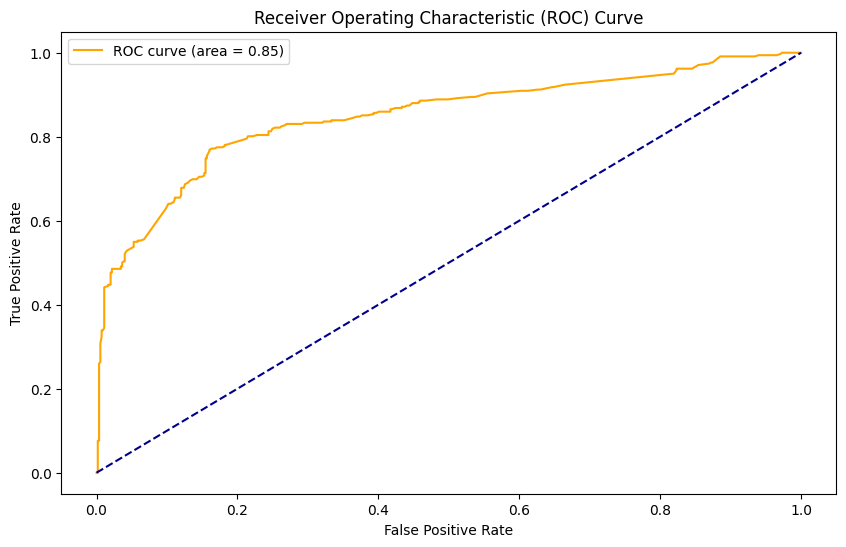

In [383]:
plot_roc_curve(y, yhat[:, 1])

## Predicting the test.csv file



In [384]:
#Let's test this model in our test.csv file------------------------------------------------

test_decision_tree = pd.read_csv('/kaggle/input/titanic/test.csv')

#Filling up the NaN Ages------------------------------------------------------------------
trainMeans2 = test_decision_tree.groupby(['Sex','Pclass'])['Age'].mean()

def age_estimate(x):
    if not np.isnan(x['Age']):                  ## if age is not NaN
        return x['Age']                         ## return itself (the age)
    return trainMeans2[x["Sex"], x['Pclass']]    ## otherwise retuns the age calculated in the trainMeans formula


test_decision_tree['Age'] = test_decision_tree.apply(age_estimate, axis=1)


#filling the NaN Fare-------------------------------------------------------------------------
trainfareAverage = test_decision_tree.groupby(['Sex','Pclass'])['Fare'].mean()

def fare_estimate(x):
    if not np.isnan(x['Fare']):                  ## if age is not NaN
        return x['Fare']                         ## return itself (the age)
    return trainfareAverage[x["Sex"], x['Pclass']]    ## otherwise retuns the age calculated in the trainMeans formula


test_decision_tree['Fare'] = test_decision_tree.apply(fare_estimate, axis=1)

#fare = Average
#test_decision_tree['Fare'].fillna()

#Getting our dummies-----------------------------------------------------------------------------

## Sex Dummies
test_decision_tree['male'] = pd.get_dummies(
    test_decision_tree['Sex'],
    drop_first=True
)
## EMBARK DUMMIES
embark_dummies2 = pd.get_dummies(
    test_decision_tree['Embarked'],                 #This time we will do the same for the embarked column
    drop_first=True,                                #dropping the first column (should be C)
    prefix='Embarked_'                              #putting a prefix so we end up with Embarked_Q and Embarked_S columns
)

test_decision_tree = pd.concat(
    [ test_decision_tree , embark_dummies2 ],    #the two dataframes we want to unite
    axis=1                                       #the axis=1 indicate we will concatenate the dataframes horizontally (add columns)
)

##P_Class Dummies
pclass_dummies2 = pd.get_dummies(
    test_decision_tree['Pclass'],              #Create a dummy that returns the columns 
    drop_first=True,                #Droppint the Pclass_1 column that will not be necessary
    prefix="Pclass_"                #Pclass_2 and #Pclass_3
)

test_decision_tree = pd.concat(
    [ test_decision_tree , pclass_dummies2 ],   #the two dataframes we want to unite
    axis=1                          #the axis=1 indicate we will concatenate the dataframes horizontally (add columns)
)

test_decision_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  male         418 non-null    bool   
 12  Embarked__Q  418 non-null    bool   
 13  Embarked__S  418 non-null    bool   
 14  Pclass__2    418 non-null    bool   
 15  Pclass__3    418 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(5)
memory usage: 38.1+ KB


In [385]:
test_log_reg = test_decision_tree

In [386]:
## Remember what columsn our baseline used:

## X = baseline_df[['Pclass__3', 'Pclass__2', 'Age', 'male']]

test_log_reg_X = test_log_reg[['Pclass__3', 'Pclass__2', 'Age', 'male']] ## let's use this df that is already transformed for us



In [387]:
log_reg_model.predict(test_log_reg_X)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [388]:
test_log_reg['Survived'] = log_reg_model.predict(test_log_reg_X).astype(int)

In [389]:
test_log_reg

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Embarked__Q,Embarked__S,Pclass__2,Pclass__3,Survived
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,True,True,False,False,True,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,False,False,True,False,True,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,True,True,False,True,False,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,True,False,True,False,True,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,False,False,True,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S,True,False,True,False,True,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,False,False,False,False,False,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,True,False,True,False,True,0
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S,True,False,True,False,True,0


In [390]:
kaggle_response2 = test_log_reg[['PassengerId','Survived']].sort_values(by = 'PassengerId')
kaggle_response2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [391]:
kaggle_response2.to_csv('Logistic_regression_response.csv', index=False)
kaggle_response2.to_csv('submission.csv', index=False)